In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf

**Step 2. In a new .ipynb notebook, reproduce the results utilizing the "Sports" dataset**

In [156]:
df = pd.read_excel('Sports_dataset/Train/Label.xlsx', index_col=0)

C:\Users\MidAutumnFestival\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [157]:
print(df.head(5))

                                                  filepaths      labels
class id                                                               
0         /content/drive/MyDrive/DATA_255/HW_2/Sports_da...  air hockey
0         /content/drive/MyDrive/DATA_255/HW_2/Sports_da...  air hockey
0         /content/drive/MyDrive/DATA_255/HW_2/Sports_da...  air hockey
0         /content/drive/MyDrive/DATA_255/HW_2/Sports_da...  air hockey
0         /content/drive/MyDrive/DATA_255/HW_2/Sports_da...  air hockey


In [158]:
df['filepaths'] = df['filepaths'].apply(lambda x: x.replace("/content/drive/MyDrive/DATA_255/HW_2/", ""))

In [159]:
print(df.head(5))

                                        filepaths      labels
class id                                                     
0         Sports_dataset/Train/air hockey/001.jpg  air hockey
0         Sports_dataset/Train/air hockey/002.jpg  air hockey
0         Sports_dataset/Train/air hockey/003.jpg  air hockey
0         Sports_dataset/Train/air hockey/004.jpg  air hockey
0         Sports_dataset/Train/air hockey/005.jpg  air hockey


In [160]:
classes = df['labels'].unique().tolist()
print(classes)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling']


In [161]:
df['img'] = df['filepaths'].apply(Image.open)
# Changing the image into gray scale
df['img'] = [i.convert("L") for i in df['img'].values]
df['img'] = df['img'].apply(np.array)

In [162]:
print(df.head(5))

                                        filepaths      labels   
class id                                                        
0         Sports_dataset/Train/air hockey/001.jpg  air hockey  \
0         Sports_dataset/Train/air hockey/002.jpg  air hockey   
0         Sports_dataset/Train/air hockey/003.jpg  air hockey   
0         Sports_dataset/Train/air hockey/004.jpg  air hockey   
0         Sports_dataset/Train/air hockey/005.jpg  air hockey   

                                                        img  
class id                                                     
0         [[83, 30, 25, 24, 28, 26, 29, 27, 28, 34, 35, ...  
0         [[58, 23, 7, 6, 5, 2, 3, 1, 1, 3, 2, 1, 2, 2, ...  
0         [[251, 249, 103, 76, 61, 77, 157, 251, 251, 10...  
0         [[26, 26, 26, 26, 26, 28, 31, 33, 31, 28, 26, ...  
0         [[156, 159, 158, 161, 159, 163, 162, 163, 164,...  


In [163]:
X = np.asarray(df['img'].tolist())
y = df['labels'].apply(classes.index).values

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 / 7), random_state=50)

In [165]:
print(X_train.shape)

(1104, 224, 224)


In [166]:
X_train = X_train / 255.0
X_test = X_test / 255.0

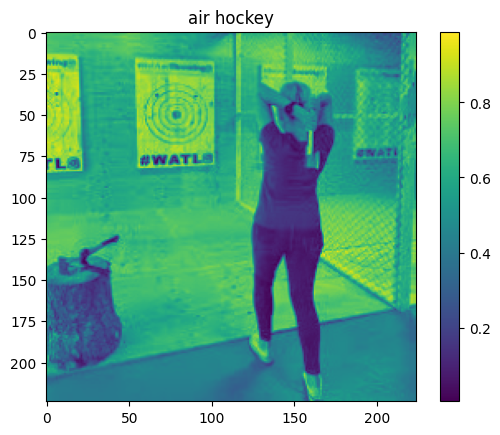

In [167]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.title(classes[y_train[i]])
plt.grid(False)
plt.show()

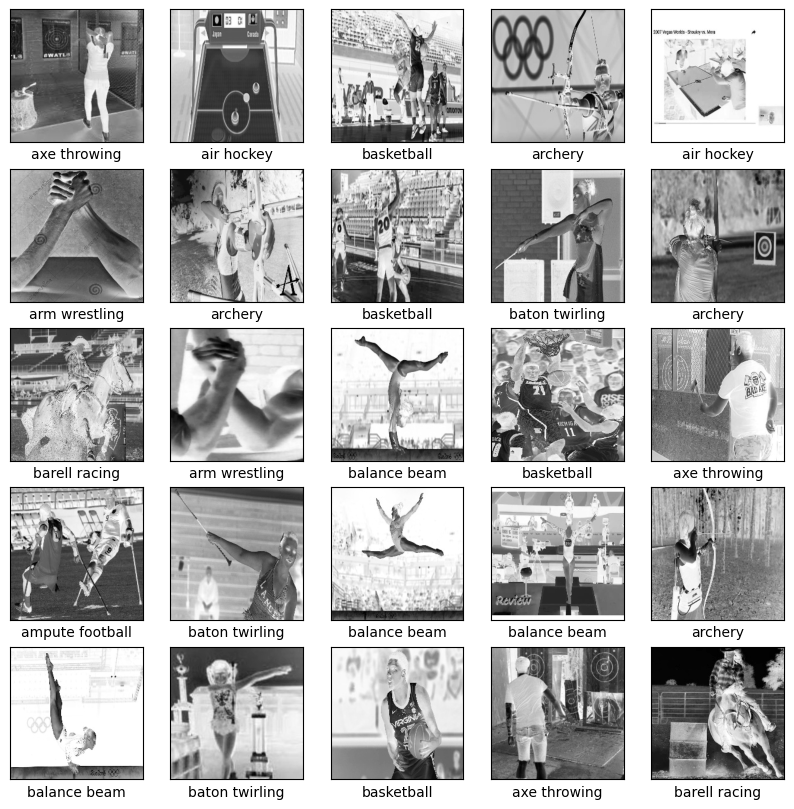

In [168]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [169]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = X_train[0].shape), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(len(classes))])

In [170]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])

In [171]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 2s 59ms/step - loss: 12.1581 - accuracy: 0.0942
Epoch 2/10
35/35 [==============================] - 2s 60ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 3/10
35/35 [==============================] - 2s 62ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 4/10
35/35 [==============================] - 2s 60ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 5/10
35/35 [==============================] - 2s 60ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 6/10
35/35 [==============================] - 2s 60ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 7/10
35/35 [==============================] - 2s 60ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 8/10
35/35 [==============================] - 2s 58ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 9/10
35/35 [==============================] - 2s 57ms/step - loss: 12.2382 - accuracy: 0.0933
Epoch 10/10
35/35 [==============================] - 2s 56ms/step - loss: 12.2382 - accuracy: 0.0933


In [172]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 100*np.max(predictions_array), classes[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [173]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 4.5793454e-24 0.0000000e+00]


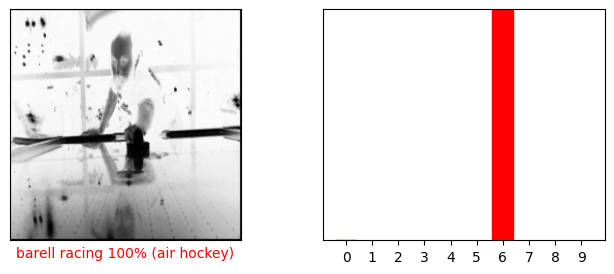

In [174]:
i = 4
print(predictions[i])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [175]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 11.6407 - accuracy: 0.1081 - 153ms/epoch - 26ms/step

Test accuracy: 0.10810811072587967


**Step 3. Report on the results in terms of prediction accuracy on the train and test datasets**

The accuracies on both the train and test datasets are really bad. The prediction accuracy on the test dataset is worse and it could be contributed to the effect of overfitting. By printing out the predictions from the model, we can see that the model predicts everything to be basketball.

**Step 4. Choose one of the proposed modifications below:**
* Add another Dense layer of 128 nodes
* Increase the current number of nodes in the layer to 256

Hypothesize how it would change the performance results

I will select to add another dense layer of 128 nodes. Since the images from the sports dataset have way more data points than those in fashion image dataset, an extra layers can improve the perforamnce of the model because it would add more levels of abstraction to the model where a single layer cannot.

**Step 5. Modify the model based on the chosen method and train**

In [176]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes))
])

In [177]:
model_2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [178]:
model_2.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 2s 53ms/step - loss: 8.8886 - accuracy: 0.1594
Epoch 2/10
35/35 [==============================] - 2s 57ms/step - loss: 2.3868 - accuracy: 0.2219
Epoch 3/10
35/35 [==============================] - 2s 50ms/step - loss: 2.1273 - accuracy: 0.2754
Epoch 4/10
35/35 [==============================] - 2s 50ms/step - loss: 2.0222 - accuracy: 0.2935
Epoch 5/10
35/35 [==============================] - 2s 50ms/step - loss: 1.9458 - accuracy: 0.3469
Epoch 6/10
35/35 [==============================] - 2s 54ms/step - loss: 1.8995 - accuracy: 0.3487
Epoch 7/10
35/35 [==============================] - 2s 57ms/step - loss: 1.8158 - accuracy: 0.3813
Epoch 8/10
35/35 [==============================] - 2s 57ms/step - loss: 1.6722 - accuracy: 0.4303
Epoch 9/10
35/35 [==============================] - 2s 58ms/step - loss: 1.7032 - accuracy: 0.4357
Epoch 10/10
35/35 [==============================] - 2s 56ms/step - loss: 1.5740 - accuracy: 0.4855


In [179]:
test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 2.6442 - accuracy: 0.2378 - 174ms/epoch - 29ms/step

Test accuracy: 0.23783783614635468


In [180]:
probability_model_2 = tf.keras.Sequential([model_2, tf.keras.layers.Softmax()])
predictions_2 = probability_model_2.predict(X_test)

6/6 [==============================] - 0s 5ms/step


[7.96617270e-02 1.58117134e-02 1.91542355e-03 5.17775714e-02
 3.95010371e-04 7.01707482e-01 9.93143185e-04 1.03877075e-02
 1.25168294e-01 1.21818697e-02]


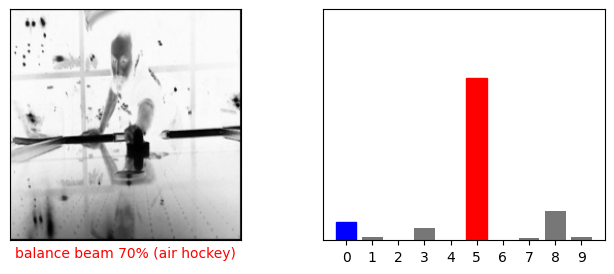

In [181]:
print(predictions_2[i])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions_2[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_2[i],  y_test)
plt.show()

**Step 6. Report on the results of the modified model and if it matches your hypothesis**

The accuracy increased from 10% to 23%. It matched the hypothesis where the extra layer help the model to identify the images better than one single layer.

**Step 7. Experiment with different optimizers, loss functions, dropout,  activation functions and observe the change in performance as you tune these hyper parameters.**

In [182]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes))
])

In [183]:
model_3.compile(optimizer = 'SGD', loss = tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])

In [184]:
model_3.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 1s 21ms/step - loss: 29.1627 - accuracy: 0.0879
Epoch 2/10
35/35 [==============================] - 1s 21ms/step - loss: 26.3557 - accuracy: 0.0888
Epoch 3/10
35/35 [==============================] - 1s 21ms/step - loss: 23.9231 - accuracy: 0.0806
Epoch 4/10
35/35 [==============================] - 1s 21ms/step - loss: 21.8017 - accuracy: 0.0987
Epoch 5/10
35/35 [==============================] - 1s 20ms/step - loss: 19.9572 - accuracy: 0.0933
Epoch 6/10
35/35 [==============================] - 1s 20ms/step - loss: 18.3577 - accuracy: 0.0833
Epoch 7/10
35/35 [==============================] - 1s 20ms/step - loss: 16.9706 - accuracy: 0.0851
Epoch 8/10
35/35 [==============================] - 1s 20ms/step - loss: 15.7678 - accuracy: 0.0851
Epoch 9/10
35/35 [==============================] - 1s 19ms/step - loss: 14.7286 - accuracy: 0.0770
Epoch 10/10
35/35 [==============================] - 1s 19ms/step - loss: 13.8232 - accuracy: 0.0842


In [185]:
test_loss, test_acc = model_3.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 13.8126 - accuracy: 0.1081 - 160ms/epoch - 27ms/step

Test accuracy: 0.10810811072587967


In the above model, we used SGD optimizer, MSE loss function, softmax activation function and a dropout of 0.2 before the output layer. The performance of this model is the same as step 1.

In [186]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(len(classes))
])

In [187]:
model_4.compile(optimizer = 'adamax', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [188]:
model_4.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 2s 58ms/step - loss: 2.6191 - accuracy: 0.1159
Epoch 2/10
35/35 [==============================] - 2s 59ms/step - loss: 2.3144 - accuracy: 0.1467
Epoch 3/10
35/35 [==============================] - 2s 58ms/step - loss: 2.2923 - accuracy: 0.1413
Epoch 4/10
35/35 [==============================] - 2s 60ms/step - loss: 2.2567 - accuracy: 0.1649
Epoch 5/10
35/35 [==============================] - 2s 60ms/step - loss: 2.2215 - accuracy: 0.1784
Epoch 6/10
35/35 [==============================] - 2s 56ms/step - loss: 2.2077 - accuracy: 0.1721
Epoch 7/10
35/35 [==============================] - 2s 58ms/step - loss: 2.2154 - accuracy: 0.1875
Epoch 8/10
35/35 [==============================] - 2s 56ms/step - loss: 2.2028 - accuracy: 0.1902
Epoch 9/10
35/35 [==============================] - 2s 57ms/step - loss: 2.1831 - accuracy: 0.2029
Epoch 10/10
35/35 [==============================] - 2s 56ms/step - loss: 2.1634 - accuracy: 0.2083


In [189]:
test_loss, test_acc = model_4.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 2.1521 - accuracy: 0.2108 - 185ms/epoch - 31ms/step

Test accuracy: 0.2108108103275299


In the above model, we used adamax optimizer, sparse categorical cross entropy loss function, tanh activation function and a dropout of 0.1 after each hidden layer. The performance of this model is better than the single layer model from the very beginning but not as good as using adam optimizer and relu activation function from step 5.

In [190]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(len(classes))
])

In [191]:
model_5.compile(optimizer = 'nadam', loss = tf.keras.losses.KLDivergence(), metrics = ['accuracy'])

In [192]:
model_5.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 4s 85ms/step - loss: 24.3568 - accuracy: 0.0833
Epoch 2/10
35/35 [==============================] - 3s 79ms/step - loss: 15.1253 - accuracy: 0.0897
Epoch 3/10
35/35 [==============================] - 3s 76ms/step - loss: 15.0233 - accuracy: 0.1078
Epoch 4/10
35/35 [==============================] - 3s 75ms/step - loss: 15.0250 - accuracy: 0.0960
Epoch 5/10
35/35 [==============================] - 3s 74ms/step - loss: 14.8187 - accuracy: 0.1014
Epoch 6/10
35/35 [==============================] - 3s 74ms/step - loss: 14.8187 - accuracy: 0.0870
Epoch 7/10
35/35 [==============================] - 2s 71ms/step - loss: 14.8187 - accuracy: 0.0960
Epoch 8/10
35/35 [==============================] - 3s 72ms/step - loss: 14.8187 - accuracy: 0.1060
Epoch 9/10
35/35 [==============================] - 3s 73ms/step - loss: 14.8187 - accuracy: 0.0897
Epoch 10/10
35/35 [==============================] - 3s 72ms/step - loss: 14.8187 - accuracy: 0.1141


In [193]:
test_loss, test_acc = model_5.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 14.1142 - accuracy: 0.1081 - 151ms/epoch - 25ms/step

Test accuracy: 0.10810811072587967


In the above model, we used nadam optimizer, KL divergence loss function, elu activation function and a dropout of 0.3 after the first hidden layer. The performance of this model is the same as the single layer model from step 2.

In conclusion, all the models implemented on step 7 cannot surpass the performance of the model on step 5. For an image classification problem, adding more layers is a higher priority than changing other hyperparameters as we can tell from the jump in accuracy in step 2 and step 5. Also, the sparse categorical cross entropy loss function works well with gray-scaled images.

In [194]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(len(classes))
])

In [195]:
model_6.compile(optimizer = 'nadam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [196]:
model_6.fit(X_train, y_train, epochs = 10)

Epoch 1/10


35/35 [==============================] - 4s 83ms/step - loss: 5.4191 - accuracy: 0.1504
Epoch 2/10
35/35 [==============================] - 3s 83ms/step - loss: 2.3866 - accuracy: 0.1531
Epoch 3/10
35/35 [==============================] - 3s 79ms/step - loss: 2.3872 - accuracy: 0.1476
Epoch 4/10
35/35 [==============================] - 3s 77ms/step - loss: 2.3241 - accuracy: 0.1531
Epoch 5/10
35/35 [==============================] - 3s 76ms/step - loss: 2.2919 - accuracy: 0.1685
Epoch 6/10
35/35 [==============================] - 3s 78ms/step - loss: 2.2677 - accuracy: 0.1748
Epoch 7/10
35/35 [==============================] - 3s 78ms/step - loss: 2.2425 - accuracy: 0.1703
Epoch 8/10
35/35 [==============================] - 3s 80ms/step - loss: 2.2018 - accuracy: 0.1957
Epoch 9/10
35/35 [==============================] - 3s 79ms/step - loss: 2.1592 - accuracy: 0.1957
Epoch 10/10
35/35 [==============================] - 3s 79ms/step - loss: 2.1942 - accuracy: 0.1947


In [197]:
test_loss, test_acc = model_6.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 2.2364 - accuracy: 0.2054 - 176ms/epoch - 29ms/step

Test accuracy: 0.20540539920330048


Just by changing model_5's loss function to sparse categorical cross entropy, the accuracy on the testing set increased.

**Step 8. Show an example of back propagation algorithm by hand (one round of forward step and backward step on a smaller network by performing derivatives by hand instead of using coding libraries, you can use the reference video: https://www.youtube.com/watch?v=0e0z28wAWfg)**

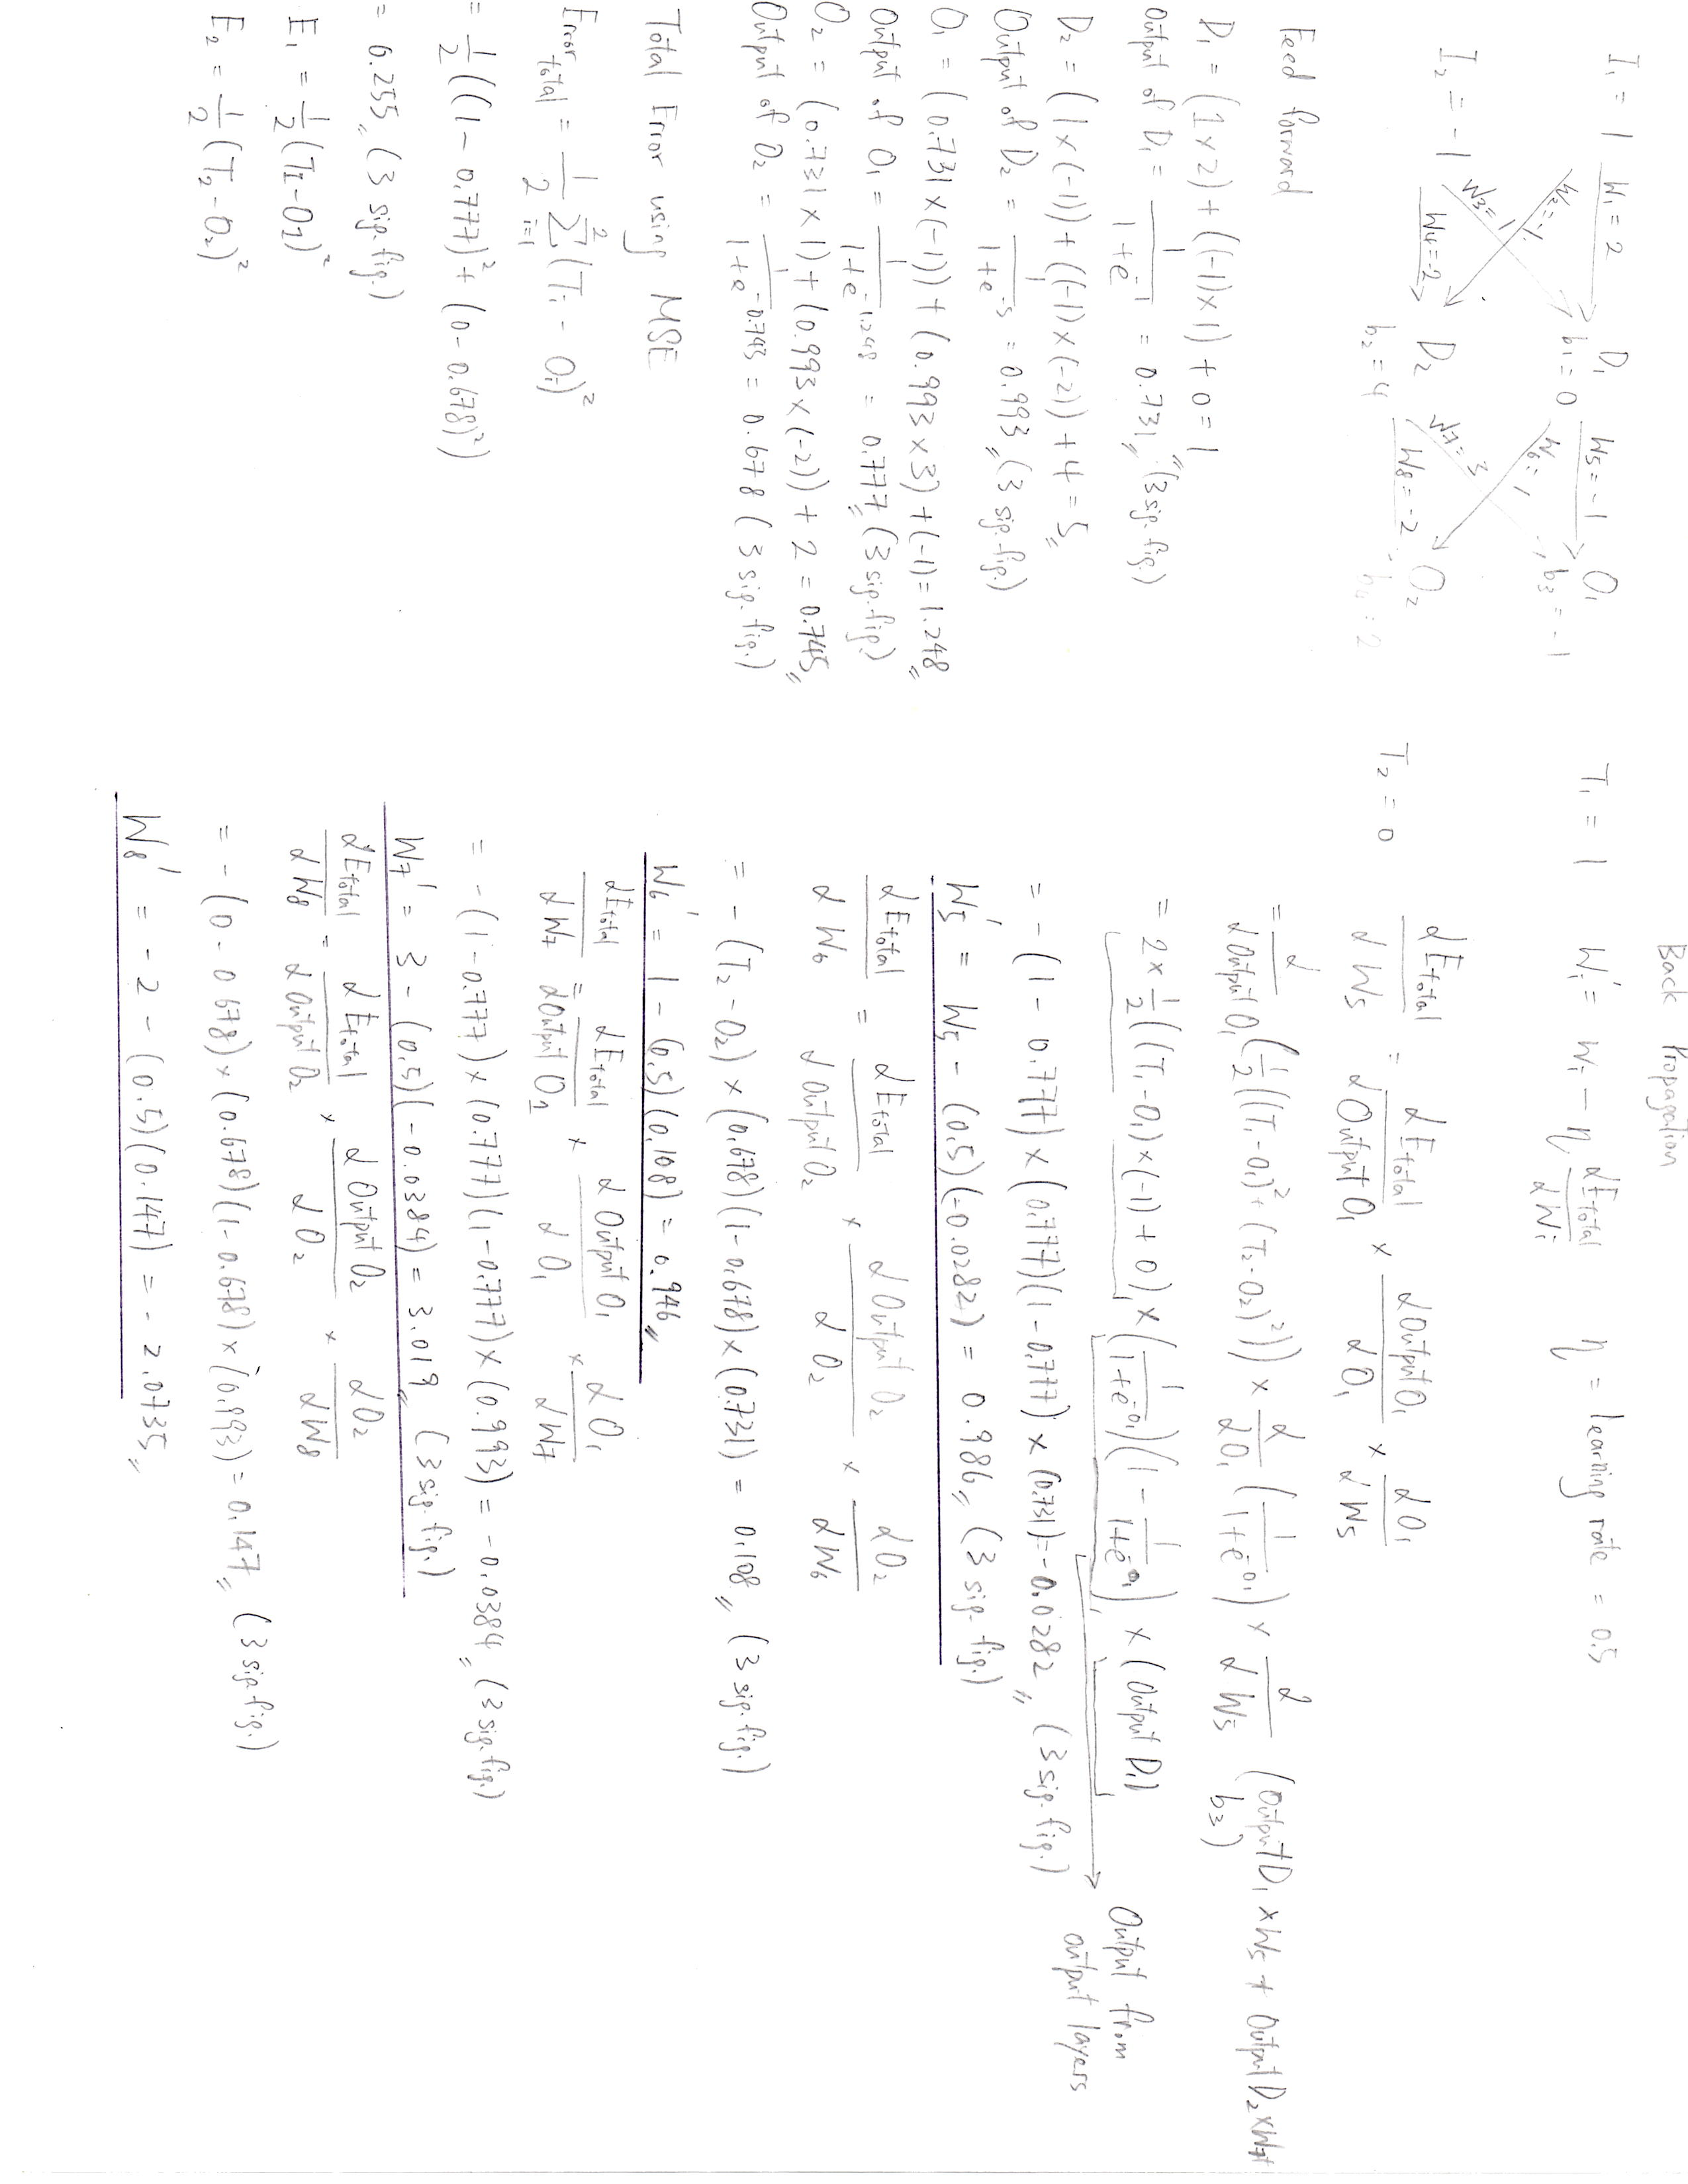



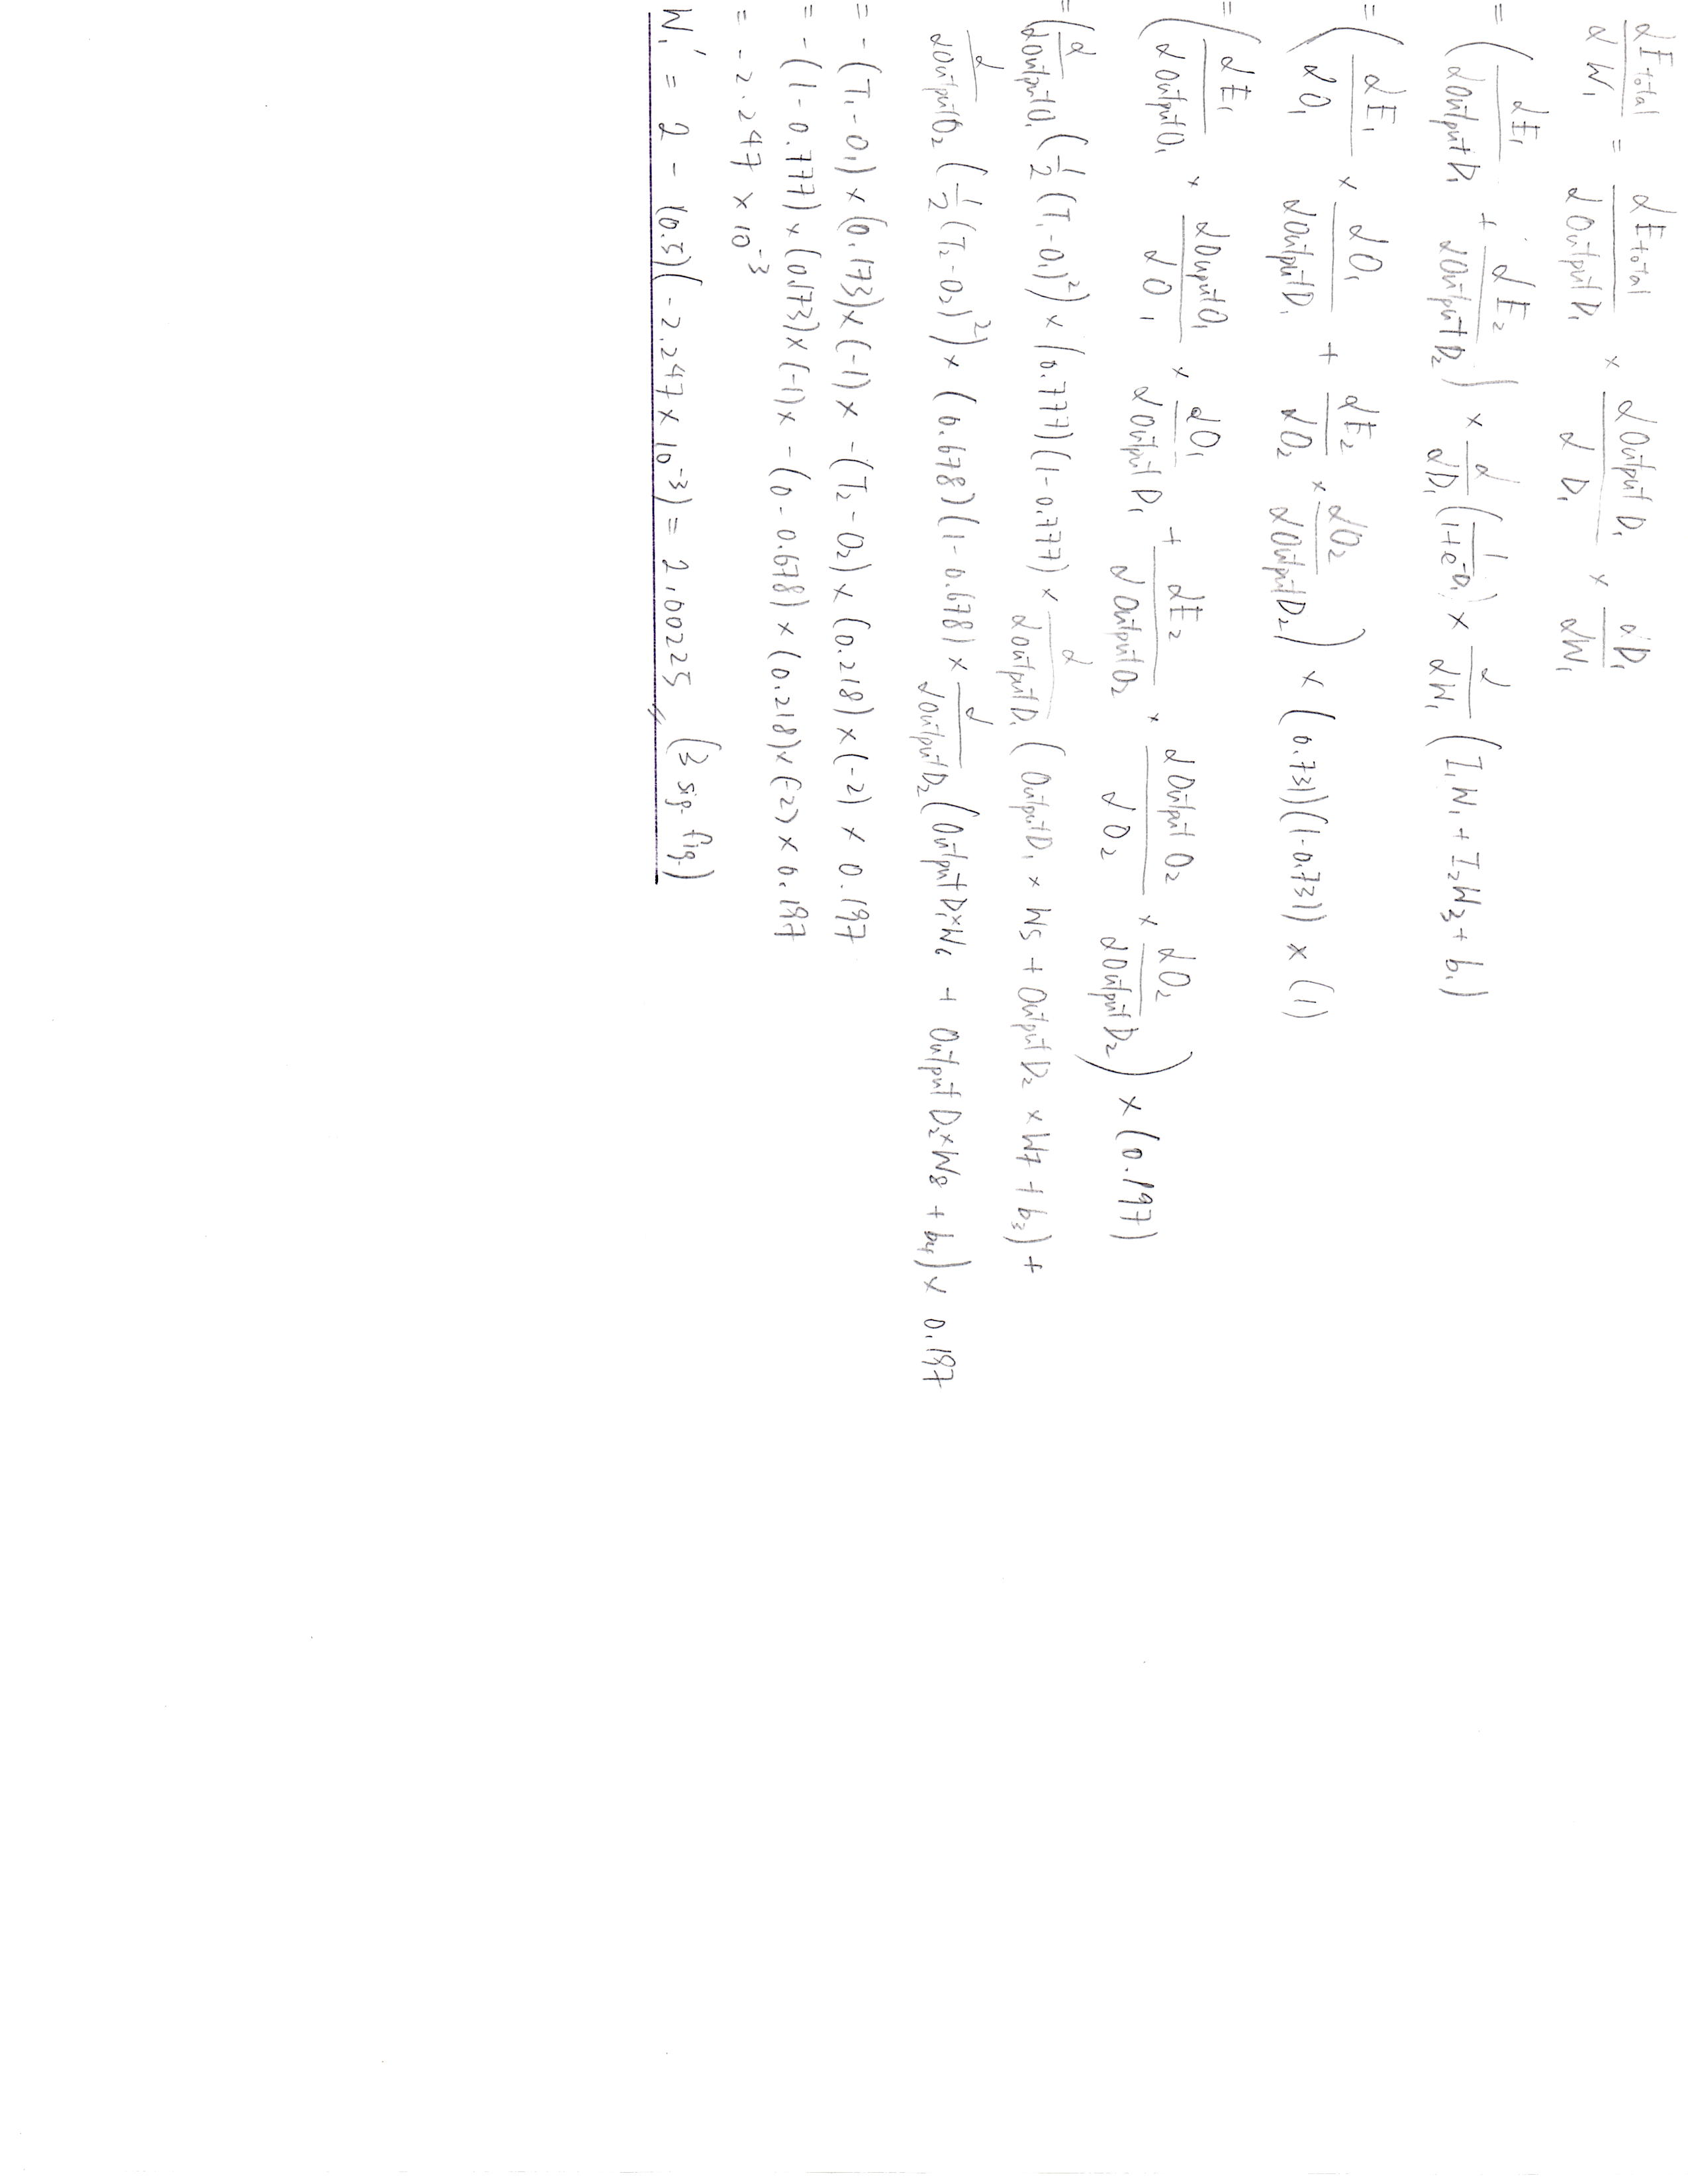

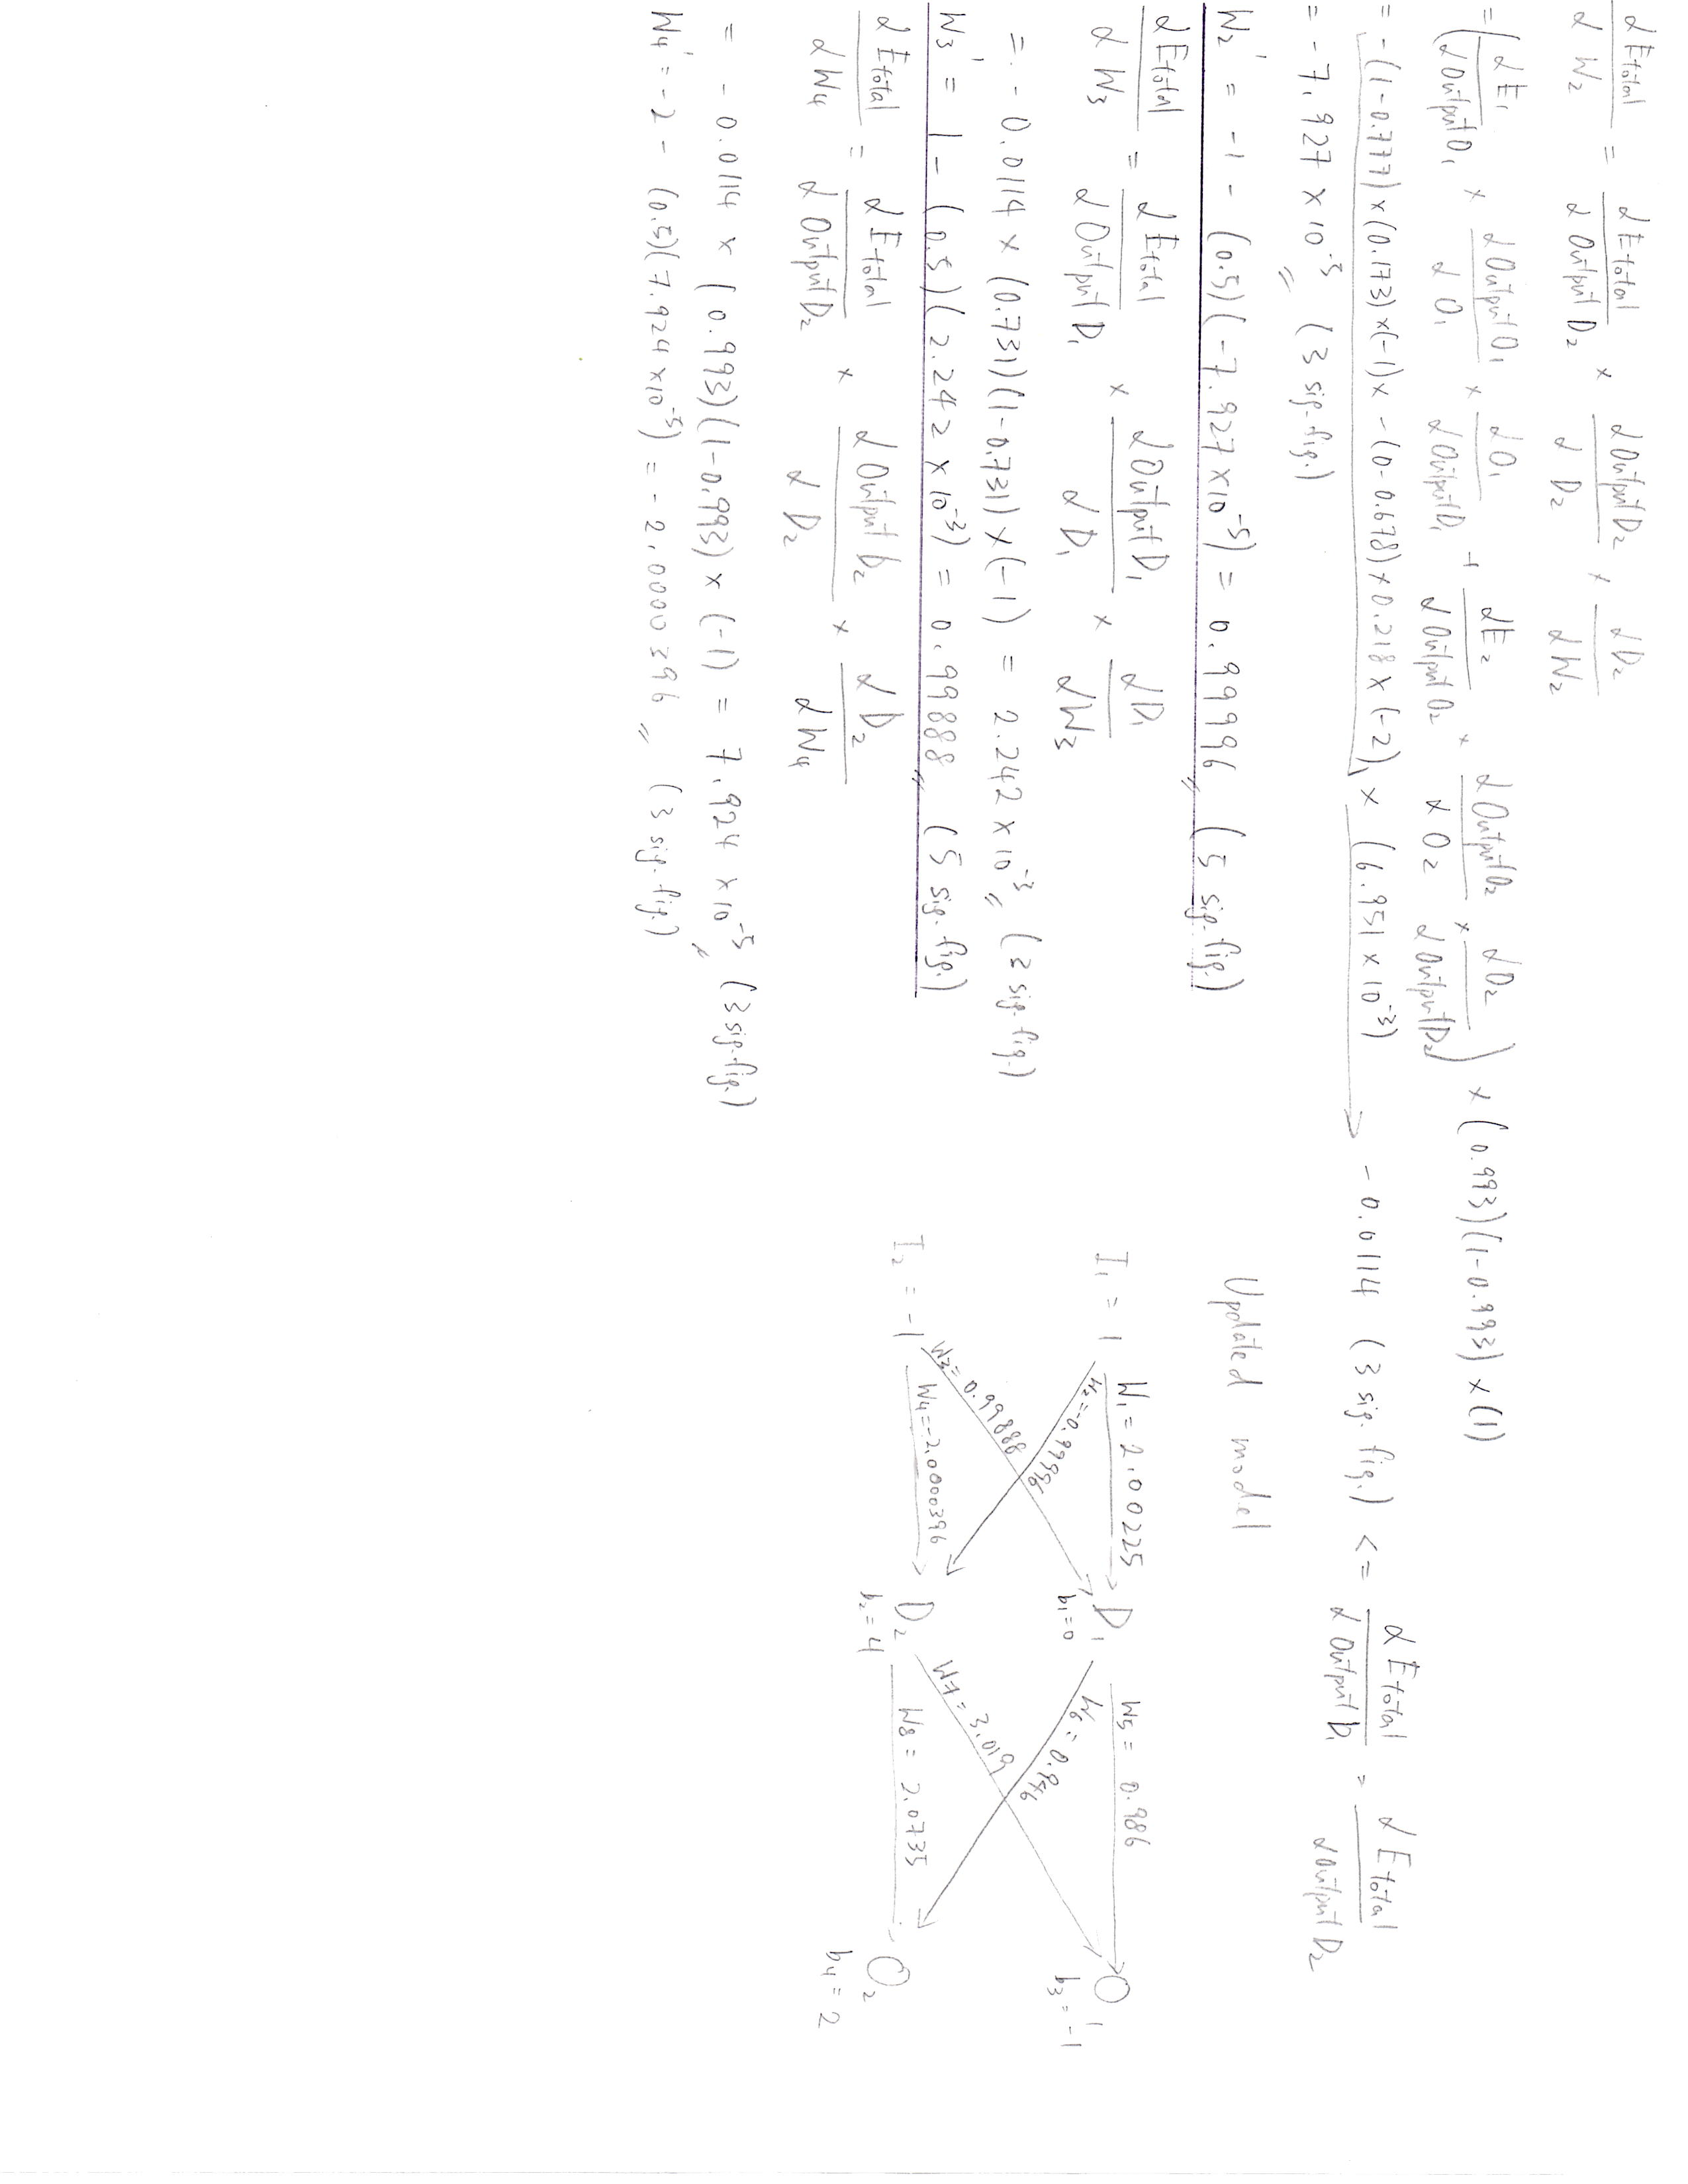